In [1]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2017. 
    Please respect copyright & acknowledge our work."""

# NewtonNDanimate.py:              MultiDimension Newton Search

%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
import time

In [2]:
def plotconfig(fig, ax, x):
    # It would be faster to edit the old plot,
    # but clearing and redrawing is simpler
    ax.clear()
    ax.set_xlim(-2, 10)
    ax.set_ylim(8, -0.5)

    L1 = 3.0
    L2 = 4.0
    L3 = 4.0

    xa = L1 * x[3]  # L1*cos(th1)
    ya = L1 * x[0]  # L1 sin(th1)
    xb = xa + L2 * x[4]  # L1*cos(th1)+L2*cos(th2)
    yb = ya + L2 * x[1]  # L1*sin(th1)+L2*sen(th2)
    xc = xb + L3 * x[5]  # L1*cos(th1)+L2*cos(th2)+L3*cos(th3)
    yc = yb - L3 * x[2]  # L1*sin(th1)+L2*sen(th2)-L3*sin(th3)

    # Top bar
    line = plt.Line2D((0, 8), (0, 0), linewidth=3, color="black")
    ax.add_artist(line)

    # Line 1
    line = plt.Line2D((0, xa), (0, ya), linewidth=1, color="red")
    ax.add_artist(line)

    # Line 2
    line = plt.Line2D((xa, xb), (ya, yb), linewidth=1, color="red")
    ax.add_artist(line)

    # Line 3
    line = plt.Line2D((xb, 8), (yb, 0), linewidth=1, color="red")
    ax.add_artist(line)

    # Mass 12
    circ = plt.Circle((xa, ya), 0.6, color="cyan")
    ax.add_artist(circ)

    # Mass 23
    circ = plt.Circle((xb, yb), 1, color="cyan")
    ax.add_artist(circ)

    # (Re)draw the canvas
    fig.canvas.draw()

In [3]:
def F(x):
    return np.array(
        [
            3 * x[3] + 4 * x[4] + 4 * x[5] - 8.0,
            3 * x[0] + 4 * x[1] - 4 * x[2],
            x[6] * x[0] - x[7] * x[1] - 10.0,
            x[6] * x[3] - x[7] * x[4],
            x[7] * x[1] + x[8] * x[2] - 20.0,
            x[7] * x[4] - x[8] * x[5],
            x[0] ** 2 + x[3] ** 2 - 1.0,
            x[1] ** 2 + x[4] ** 2 - 1.0,
            x[2] ** 2 + x[5] ** 2 - 1.0,
        ]
    )

In [4]:
def dFi_dXj(x, n, h=1e-4):
    H = np.eye(n) * h / 2
    X = x.reshape(n, 1)  # column vector

    f_p = F(X + H)
    f_n = F(X - H)

    return (f_p - f_n) / h

<IPython.core.display.Javascript object>


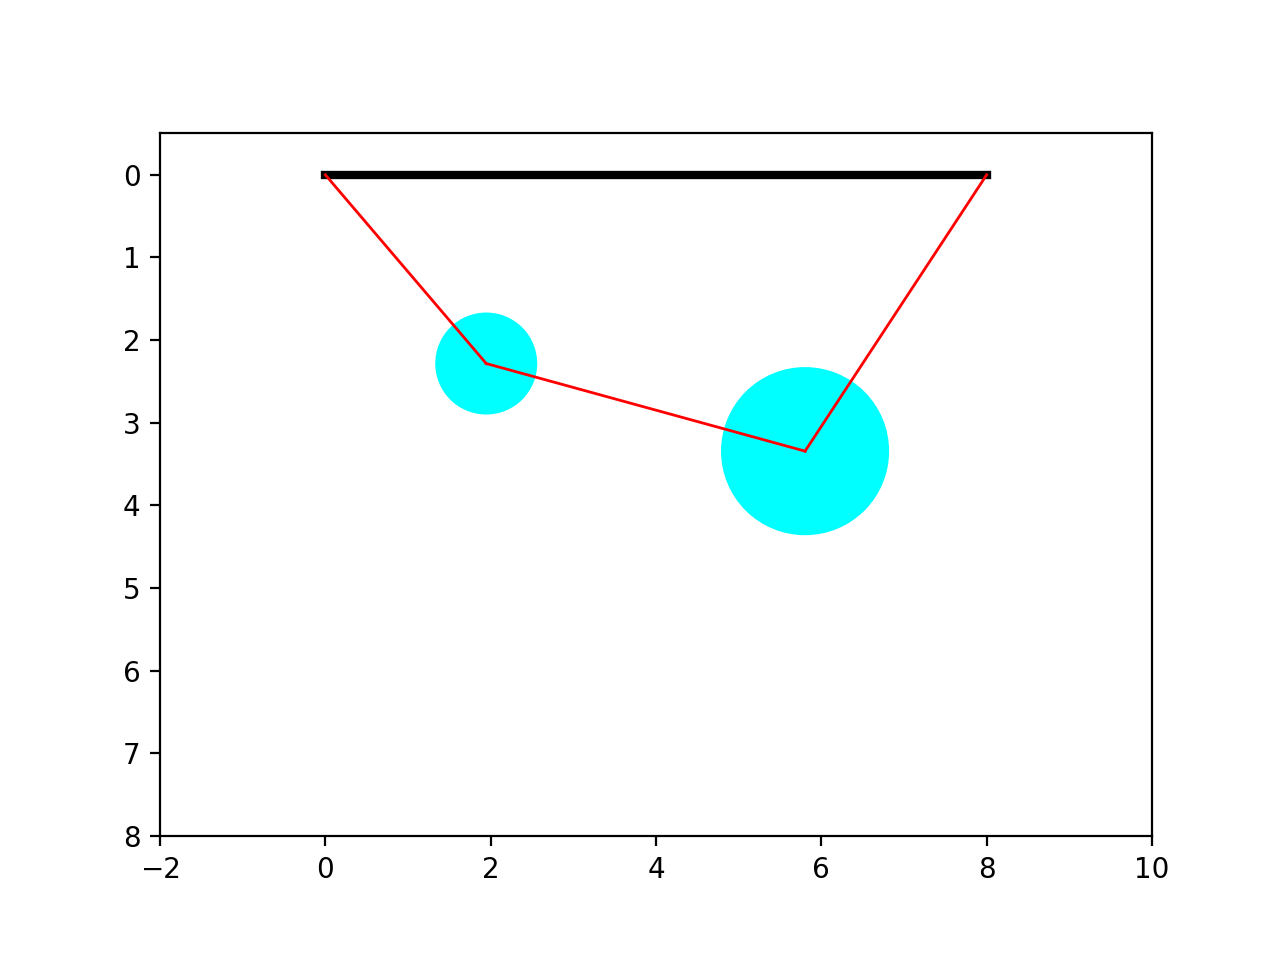

Number of iterations =  8
Final Solution:
x[0] = 0.7610026921032023
x[1] = 0.26495381027986004
x[2] = 0.8357058293572618
x[3] = 0.6487487207020479
x[4] = 0.9642611048977284
x[5] = 0.5491773545757356
x[6] = 17.160209784580484
x[7] = 11.54527968431142
x[8] = 20.271528044627093


In [5]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

n = 9
eps = 1e-3

# Initial guess
x = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0])

for it in range(100):
    # 1 second between plots
    time.sleep(1)

    # Compute f and its derivative
    f = F(x)
    deriv = dFi_dXj(x, n)

    # Solve for Δx
    Δx = np.linalg.solve(deriv, -f)

    # Compute new x
    x += Δx

    # Plot the current configuration
    plotconfig(fig, ax, x)

    # Compute errors
    errX = abs(Δx)
    errX[x != 0] /= abs(x[x != 0])  # Relative error only if x is not 0
    errF = abs(f)

    # Quit if all errors are low
    if np.all(errX <= eps) and np.all(errF <= eps):
        break

print("Number of iterations = ", it + 1)
print("Final Solution:")
for i in range(0, n):
    print(f"x[{i}] = {x[i]}")